<a href="https://colab.research.google.com/github/eshagr/telco_churn_eda/blob/main/Telco_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
from google.colab import files
uploaded =files.upload()

Saving Telco_New.xlsx to Telco_New.xlsx


In [ ]:
import io
import random
import math
from sklearn import preprocessing
from scipy import stats
from random import random 
import timeit
import warnings
warnings.filterwarnings("ignore")
churn = pd.read_excel(io.BytesIO(uploaded['Telco_New.xlsx']))

Telco is a company that provides both phone and internet services, and other streaming services in CA, USA.
Churn Reason is the output column

**Understanding the data**

1.Telco data has - 
> 7043 rows and 33 columns


In [ ]:
churn.shape

(7043, 33)

2.Snapshot of how churn data looks like

In [ ]:
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn_Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


3.Churn datatypes. 
More columns are object compared to int and float

In [ ]:
churn.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn_Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

Few columns that need dtype conversions

In [ ]:
churn['Total Charges']= pd.to_numeric(churn['Total Charges'], errors='coerce')
churn['Total Charges'].dtypes
churn['Latitude'] = churn['Latitude'].astype(str)
churn['Longitude'] = churn['Longitude'].astype(str)
churn['Zip Code']= churn['Zip Code'].astype(str)

4. Any missing values?
Two columns Churn Reason and Total Charges have some missing values 
*   Churn Reason has 5174 blank cells for customers who have not churned
*   Total Charges has 11 columns 





In [ ]:
churn.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn_Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

All the rows with Total Charges value as 'NaN'
* All of them are churn='No'
* Because they are 11, we might consider dropping them






 

In [ ]:
len(churn[churn['Total Charges'].isna()])
rate = (11/7043)*100
rate

0.1561834445548772

In [ ]:
churn[churn['Total Charges'].isna()]
#  or churn[churn['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn_Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


**Demographics **



1.Who churns more?
Count: Gender and Age(Senior Citizen)

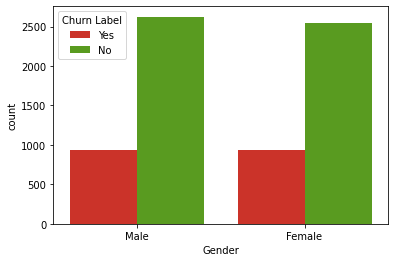

In [ ]:
color2= {"Yes":"#e61c0e","No":"#57b00b"}
sns.countplot(x='Gender', data=churn, hue='Churn Label', palette=color2)
plt.show()

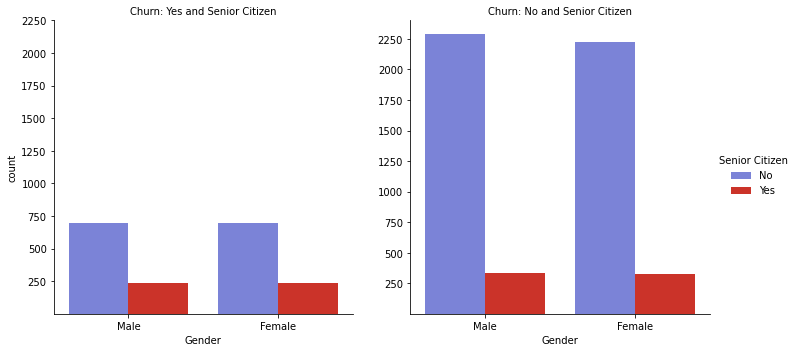

In [ ]:
churn['Senior Citizen'].replace({1:'Yes', 0:'No'}, inplace=True)
color3={"Yes":"#e61c0e","No":"#6c76e6"}
g =sns.catplot(x='Gender', hue='Senior Citizen', data=churn, col='Churn Label', kind='count', palette=color3, sharey=False)
g.set_titles(col_template='Churn: {col_name} and Senior Citizen')

g.set(yticks=[250,500,750,1000,1250,1500,1750, 2000,2250])
plt.show()

In [ ]:
churn.groupby(['Gender','Senior Citizen'])['Churn Label'].value_counts()

Gender  Senior Citizen  Churn Label
Female  No              No             2221
                        Yes             699
        Yes             No              328
                        Yes             240
Male    No              No             2287
                        Yes             694
        Yes             No              338
                        Yes             236
Name: Churn Label, dtype: int64

In [ ]:
churn.groupby('Churn Label')['Gender'].value_counts()

Churn Label  Gender
No           Male      2625
             Female    2549
Yes          Female     939
             Male       930
Name: Gender, dtype: int64

Observations: 
* Both male and female have similar churn rate
* Even senior citizens (both genders) have similar churn rate
* Implies gender and age do not have much impact on churn rate










**2.Cities with the highest churn number and rate**
* Maximum churned customers are from LA - 4.8%
* Plausible reason could be the services issues with fiber optic and DSL




In [ ]:
city_churn_label_yes = churn[churn['Churn Label']=='Yes']
# city_counts = city_churn_label_yes[['City','Monthly Charges']].value_counts()
# city_counts = churn[churn['Churn Label']=='Yes'][['City','Monthly Charges']].value_counts(ascending =False)

In [ ]:
city_counts = churn[churn['Churn Label']=='Yes']['City'].value_counts()
city_counts[city_counts >= 15].to_frame()

,City
Los Angeles,90
San Diego,50
San Francisco,31
San Jose,29
Sacramento,26
Fresno,16
Long Beach,15


In [ ]:
city_counts = len(churn[churn['Churn Label']=='Yes'])
churn_yes_city = churn[churn['Churn Label']=='Yes']
df=churn_yes_city['City'].value_counts()
df
city_churn_rate = (df/city_counts)*100
city_churn_rate.head()



Los Angeles      4.815409
San Diego        2.675227
San Francisco    1.658641
San Jose         1.551632
Sacramento       1.391118
Name: City, dtype: float64

In [ ]:
churn_city_internet = city_churn_label_yes[['City', 'Internet Service']].value_counts()
churn_city_internet


City           Internet Service
Los Angeles    Fiber optic         54
               DSL                 32
San Diego      Fiber optic         31
San Francisco  Fiber optic         24
Sacramento     Fiber optic         17
                                   ..
Montebello     Fiber optic          1
Montclair      Fiber optic          1
Montague       No                   1
Monrovia       Fiber optic          1
Zenia          Fiber optic          1
Length: 1092, dtype: int64

**3. Contract impacting the churn rate?**
* Month-to-month contracts have higher churn rate
* Probably customers who churn find more lucrative and frugal offers from the competitors 




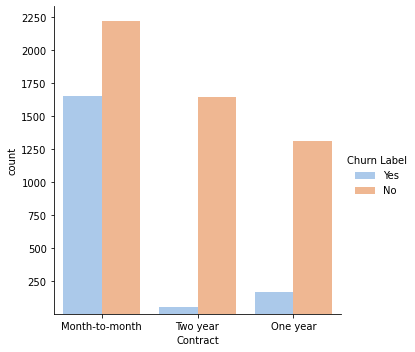

In [ ]:
g=sns.set_palette("pastel")
g=sns.catplot(x='Contract', data=churn, hue='Churn Label', kind='count')
g.set(yticks=[250,500,750,1000,1250,1500,1750, 2000,2250])

plt.show()

*Insights*
**Average tenure of Telco customers**
* Below graph shows that churn rate is higher in first 12 months
* Churn rate decreases as tenure increases
* Overall average tenure is 29 months
* Average tenure of churned customers is 10 months

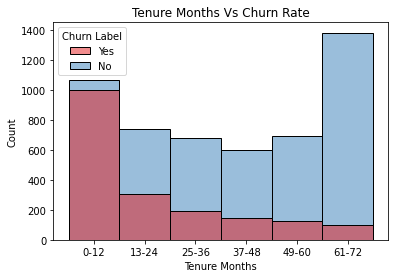

In [ ]:
g=sns.histplot(x='Tenure Months',data=churn,hue ='Churn Label', bins = range(min(churn['Tenure Months']), 
                                                         max(churn['Tenure Months'])+12,12 ), palette="Set1")
g.set_xticks([6,18,30,42,54,66])
g.set_xticklabels(["0-12", "13-24", "25-36", "37-48", "49-60","61-72"])
g.set_title('Tenure Months Vs Churn Rate')
plt.show()

In [ ]:
churn['Tenure Months'].median()


29.0

In [ ]:
churn.groupby('Churn Label')['Tenure Months'].median()


Churn Label
No     38
Yes    10
Name: Tenure Months, dtype: int64

**Monthly Charges Vs Churn Rate **
* Higher monthly charges tend to have higher churn rate
* Monthly charges between 78-98$ have the maximum churned users, and can be further investigated 




In [ ]:
monthly_charge_bins= pd.cut(churn['Monthly Charges'], bins=5).value_counts().sort_index()
monthly_charge_bins

(18.15, 38.35]     1797
(38.35, 58.45]     1005
(58.45, 78.55]     1367
(78.55, 98.65]     1826
(98.65, 118.75]    1048
Name: Monthly Charges, dtype: int64

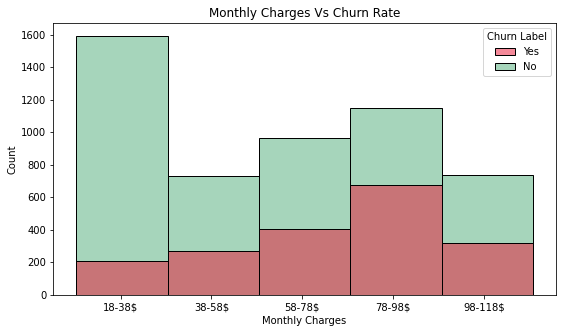

In [ ]:
color ={"Yes":"#eb1535", "No":"#4ead79"}
g = sns.histplot(x='Monthly Charges', data=churn, hue='Churn Label', palette=color, bins=5)
g.set_xticks([28,48,68,88,108])
g.set_xticklabels(["18-38$", "38-58$", "58-78$", "78-98$", "98-118$"])
plt.title('Monthly Charges Vs Churn Rate')
plt.gcf().set_size_inches(9, 5)
plt.show()


**Insights **
* 660 customers with monthly charges within range (77-98$) have churned from Telco
* This makes 35% of the total churned customers 
* The service(s) most customers were unhappy with is Fiber optic and followed by DSL









In [ ]:
churn_yes = churn[churn['Churn Label']=='Yes']
# Only churned customers dataframe
churn_yes['Internet Service'].value_counts()


Fiber optic    1297
DSL             459
No              113
Name: Internet Service, dtype: int64

Monthly charges breakdown of churned customers

In [ ]:
months_bins = pd.cut(churn_yes['Monthly Charges'], bins=5).value_counts().sort_values(ascending = False)
months_bins.to_frame()


,Monthly Charges
"(78.55, 98.45]",666
"(58.65, 78.55]",400
"(98.45, 118.35]",324
"(38.75, 58.65]",274
"(18.751, 38.75]",205


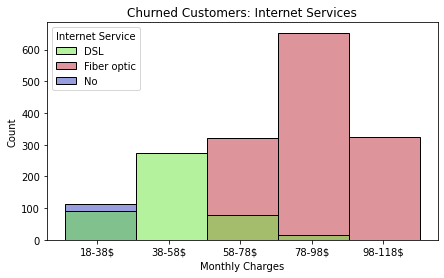

In [ ]:
color1 = {"Fiber optic":"#bd2a38","DSL":"#6be63e", "No":"#313dbd"}

g = sns.histplot(x='Monthly Charges', data=churn_yes, bins=5, hue='Internet Service', palette=color1)
g.set_xticks([28,48,68,88,108])
g.set_xticklabels(["18-38$", "38-58$", "58-78$", "78-98$", "98-118$"])
plt.title('Churned Customers: Internet Services')
plt.gcf().set_size_inches(7, 4)
plt.show()

*Insights*
Total Charges Vs Churn Rate 
* Higher the total charges, lower the churn rate
* Indicates that older customers have lower churn rate.



In [ ]:
total_charges_bins = pd.cut(churn['Total Charges'], bins = 5).value_counts().sort_index()
total_charges_bins

(10.134, 1752.0]    3937
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: Total Charges, dtype: int64

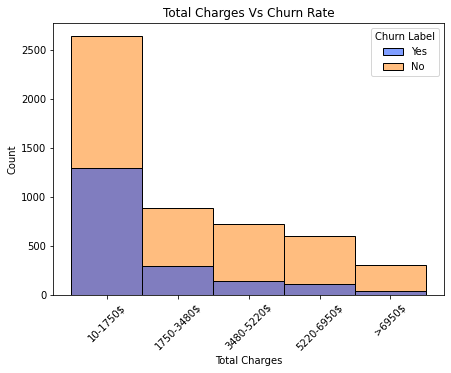

In [ ]:
g = sns.histplot(x='Total Charges', data=churn, hue='Churn Label', palette='bright', bins=5)
g.set_xticks([881,2618,4351,6084,7799])
g.set_xticklabels(["10-1750$", "1750-3480$", "3480-5220$", "5220-6950$", ">6950$"], rotation=45)
plt.title('Total Charges Vs Churn Rate')
plt.gcf().set_size_inches(7, 5)
plt.show()

**Services **
* Majority customers use phone service 90%
* Customers who don't use phone service 10%, only use DSL service 



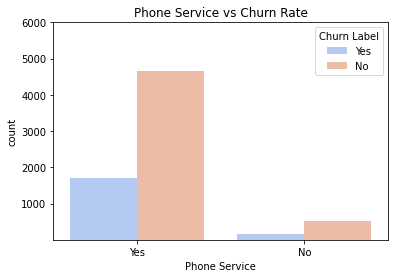

In [ ]:
g=sns.countplot(x='Phone Service', data=churn, hue='Churn Label', palette='coolwarm')
g.set(yticks=[1000,2000,3000,4000, 5000, 6000])
plt.title('Phone Service vs Churn Rate')
plt.show()


In [ ]:
rate = len(churn[churn['Phone Service']=='No'])/len(churn)
rate

0.09683373562402385

**Type of internet preference of phone service users**
* Fiber optic internet is the preferred choice, 44% customers use it.
* Churn rate of fiber optic users is also high - 41%
* It would be useful to investigate why so many fiber optic customers churn?



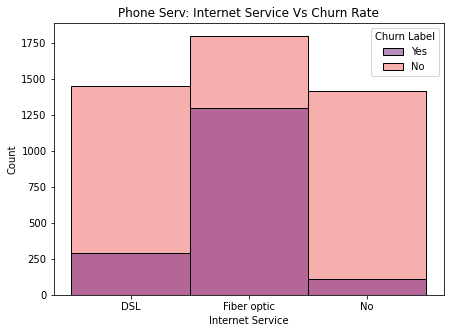

In [ ]:
phone_yes = churn[churn['Phone Service']=='Yes']
g=sns.histplot(x=phone_yes['Internet Service'], palette = "magma" ,data=phone_yes, hue=phone_yes['Churn Label'])
plt.title('Phone Serv: Internet Service Vs Churn Rate')
plt.gcf().set_size_inches(7, 5)
plt.show()


In [ ]:
phone_yes[['Churn Label','Internet Service']].value_counts()

Churn Label  Internet Service
No           Fiber optic         1799
             DSL                 1450
             No                  1413
Yes          Fiber optic         1297
             DSL                  289
             No                   113
dtype: int64

Users with 'No' phone service
* Use DSL as a prefered service







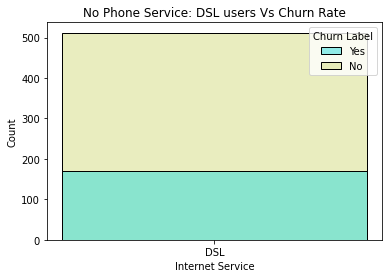

In [ ]:
phone_no = churn[churn['Phone Service']=='No']
g=sns.histplot(x=phone_no['Internet Service'], data=phone_no,hue=phone_no['Churn Label'], palette='rainbow')
plt.title('No Phone Service: DSL users Vs Churn Rate')
plt.show()

In [ ]:
len(churn[churn['Phone Service']=='Yes'])

6361

Top Services used Telco customers (by count)
* Fiber optic internet service - 44%
* Streaming movies- 39% and Streaming TV - 38.5%
* Online backup -34% & device protection 34%






In [ ]:
churn_temp= churn[['Internet Service','Online Security', 'Online Backup', 
                   'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']]
churn_top_serv = churn_temp.melt(var_name='Service Name', value_name='Type').value_counts().sort_values(ascending =False)
churn_top_serv 



Service Name       Type               
Online Security    No                     3498
Tech Support       No                     3473
Internet Service   Fiber optic            3096
Device Protection  No                     3095
Online Backup      No                     3088
Streaming TV       No                     2810
Streaming Movies   No                     2785
                   Yes                    2732
Streaming TV       Yes                    2707
Online Backup      Yes                    2429
Device Protection  Yes                    2422
Internet Service   DSL                    2421
Tech Support       Yes                    2044
Online Security    Yes                    2019
Device Protection  No internet service    1526
Online Backup      No internet service    1526
Tech Support       No internet service    1526
Internet Service   No                     1526
Streaming Movies   No internet service    1526
Streaming TV       No internet service    1526
Online Security    No

In [ ]:
len(churn_temp[churn_temp['Internet Service']=='Fiber optic'])

3096

In [ ]:
len(churn_temp)

7043

**Top services used by customers who churn**
* Fiber optic internet services - 69.4% 
* Streaming movies - 44% and Streaming TV - 43.5%
* Device Protection - 29%
* Online Backup 28%









In [ ]:
churn_yes = churn[churn['Churn_Value']==1]
churn_yes = churn_yes[['Internet Service','Online Security', 'Online Backup', 
                       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']]
churn_yes_top_serv =  churn_yes.melt(var_name='Churn_Y: Serv Used', value_name = 'Type').value_counts().sort_values(ascending = False)
churn_yes_top_serv


Churn_Y: Serv Used  Type               
Online Security     No                     1461
Tech Support        No                     1446
Internet Service    Fiber optic            1297
Online Backup       No                     1233
Device Protection   No                     1211
Streaming TV        No                      942
Streaming Movies    No                      938
                    Yes                     818
Streaming TV        Yes                     814
Device Protection   Yes                     545
Online Backup       Yes                     523
Internet Service    DSL                     459
Tech Support        Yes                     310
Online Security     Yes                     295
Device Protection   No internet service     113
Online Backup       No internet service     113
Tech Support        No internet service     113
Internet Service    No                      113
Streaming Movies    No internet service     113
Streaming TV        No internet service     113


In [ ]:
Movies = (len(churn_temp[churn_temp['Device Protection']=='Yes'])/len(churn_temp))*100
Movies

34.38875479199205

Calculations!

In [ ]:
# len(churn_yes[churn_yes['Internet Service']=='Fiber optic'])
# len(churn_yes[churn_yes['Internet Service']=='DSL'])
# len(churn_yes[churn_yes['Streaming Movies']=='Yes'])
# len(churn_yes[churn_yes['Streaming TV']=='Yes'])
# len(churn_yes[churn_yes['Device Protection']=='Yes'])
# len(churn_yes[churn_yes['Online Backup']=='Yes'])
# len(churn_yes[churn_yes['Tech Support']=='Yes'])
# len(churn_yes[churn_yes['Online Security']=='Yes'])
# len(churn_yes[churn_yes['Device Protection']=='Yes'])
# len(churn_yes)
# Percent_Fibre_Optic = (len(churn_yes[churn_yes['Internet Service']=='Fiber optic'])/len(churn_yes))*100
# Percent_Fibre_Optic
# Percent_OnlBackup = (len(churn_yes[churn_yes['Online Backup']=='Yes'])/len(churn_yes))*100
# Percent_OnlBackup
# Percent_DSL = (len(churn_yes[churn_yes['Internet Service']=='DSL'])/len(churn_yes))*100
# Percent_DSL
# Percent_StrMovies = (len(churn_yes[churn_yes['Streaming Movies']=='Yes'])/len(churn_yes))*100
# Percent_StrMovies
# Percent_StrTV = (len(churn_yes[churn_yes['Streaming TV']=='Yes'])/len(churn_yes))*100
# Percent_StrTV
# Percent_DevProt = (len(churn_yes[churn_yes['Device Protection']=='Yes'])/len(churn_yes))*100
# Percent_DevProt



**Churn rate of Telco customer is 26.5%**


In [ ]:
len(churn[churn['Churn Label']=='Yes'])
len(churn)
churn_rate = (len(churn[churn['Churn Label']=='Yes'])/len(churn))*100
churn_rate

26.536987079369588